# Octave Basics
This notebook provides a brief overview of useful notions for the scientific programming language _GNU Octave_. For a more general introduction to Octave, as well as additional coding examples, see the [Octave Programming Tutorial](https://en.wikibooks.org/wiki/Octave_Programming_Tutorial). Note that the Octave syntax is largely compatible with _MathWorks MATLAB_. In fact, every script featured in this course can be directly copy/pasted onto MATLAB and will run without any modifications. 

Multiplication

Dot Multiplication (functions of time example)

Meshgrid (Surf)


## Matrix Multiplication
The **product operator** `*` should be interpreted in terms of a matrix multiplication (row vs column). Given `a*b`, the output will have the same number of colums as `a` and the same number of rows as `b`. The only exception is when either of the two is a scalar, in which case the output will inherit the dimensions of the other variable.

In [18]:
% a: Two rows, three columns
a = [1 2 3;
     4 5 6];

% b: Three rows, one column
b = [7;8;9];

% Correct use of "*" (output: two rows, one column)
c = a*b

% Incorrect use of "*" (output: error)
d = b*a

c =

    50
   122

error: operator *: nonconformant arguments (op1 is 3x1, op2 is 2x3)


When `a` and `b` are column vectors in $\mathbb R^n$, `a*b` will output an error. To multiply two column vectors, it is necessary to use the **transpose operator** `'`. Based on which of the two is transposed, we obtain the **inner product** `a'*b`, which outputs a scalar, or the **outer product** `a*b'`, which outputs a $n\times n$ matrix.

In [19]:
% Column Vectors
a = [1;2;3];
b = [4;5;6];

% Inner Product
inner = a'*b

% Outer Product
outer = a*b'

inner = 32
outer =

    4    5    6
    8   10   12
   12   15   18



When `A` is a $n\times n$ matrix and `b` is a column vector in $\mathbb R^n$, `c=A*b` outputs another column vector in $\mathbb R^n$. If the matrix `A` is invertible, the **backslash** operator `\` is such that `A\A` is equal to the identity matrix (computationally, `A\A` is equivalent to $A^{-1}A$). This is sufficient to ensure `A\c` is equal to `b` since the left division of $c=Ab$ yields $A^{-1} c=A^{-1} Ab=b$.

_[Note:]_ Although it is also possible to use the command `inv(A)*c` to obtain `b`, computing the matrix inverse $A^{-1}$ is numercially more expensive than finding a vector $b$ that satisfies $c = A^{-1}b$. As such, the use of the `inv` function is discouraged unless there is a specific need to compute the inverse matrix.

In [22]:
% Invertible Square Matrix
A = [1 2 3
     4 0 6
     7 8 9];

% Column vector
b = [1;2;3];

% Matrix Product
c = A*b

% Matrix Inverse
A\A
A\c

c =

   14
   22
   50

ans =

   1.0000        0   0.0000
  -0.0000   1.0000   0.0000
        0        0   1.0000

ans =

   1
   2
   3



## Elementwise Multiplication
The **elementwise product** `.*` is an important tool for scientific computation, despite being seldom used in mathematics. Given two arrays `a` and `b` of the same dimensions, the elementwise product multiplies the individual elements of the corresponding cells of `a` and `b`. 

In [28]:
% Column Vectors
a = [1;2;3];
b = [4;5;6];

% Elementwise Product
elwise = a.*b

elwise =

    4
   10
   18



The most common use of the elementwise product is to evaluate a function for $x(t)$ for multiple values of the argument $t$. For example, the function
$x(t)=e^{-t}\cos(2\pi t)$ must be generated using the `.*` operator, since each element of `x` is computed at the corresponding value of `t`.

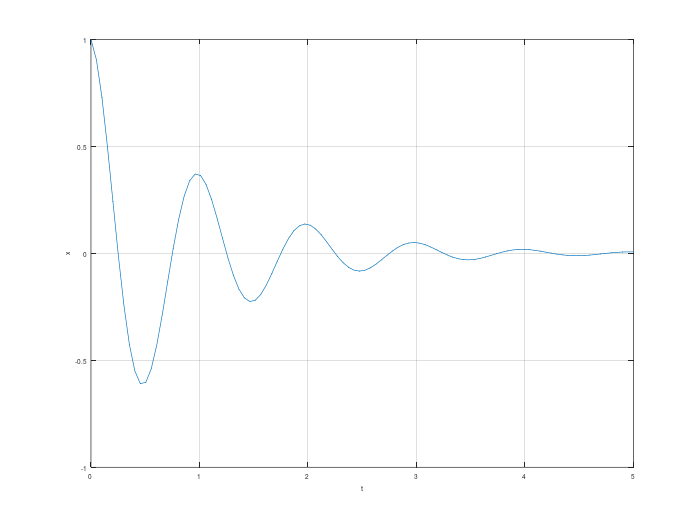

In [32]:
% Time Vector
t = linspace(0,5);

% Signal
x = exp(-t).*cos(2*pi*t);

% Plot x(t)
plot(t,x); grid on
xlabel('t'); ylabel('x')

The same idea applies to two-variable functions $y=f(x_1,x_2)$, where it is common to generate a grid of $(x_1,x_2)$ coordinates and compute $y$ at each point in the grid. For example, the function $y = x_1x_2$ can be generated as follows

In [34]:
% Grid Coordinates
X1 = [1 2 3
      1 2 3
      1 2 3];
X2 = [0  0  0
      1  1  1
      10 10 10];

% Compute Y for each Point in the Grid
Y = X1.*X2

Y =

    0    0    0
    1    2    3
   10   20   30



The command `meshgrid` can be used to generate larger grids of $(x_1,x_2)$ coordinates and is useful for creating two-dimensional plots. For example, the following code can be used to plot the function $y=\cos(x_1)x_2+x_2^2$. Note the use of the **elementwise power** `.^` to compute $x_2^2$ for each value of $x_2$.

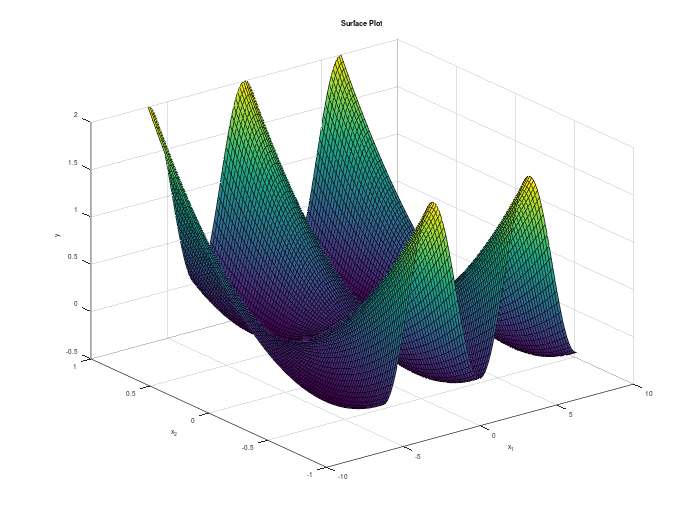

In [45]:
% Generate Grid
[X1,X2]=meshgrid(linspace(-2*pi,2*pi),linspace(-1,1));

% Compute Y for each Point in the Grid
Y = cos(X1).*X2+X2.^2;

% Surface Plot
surf(X1,X2,Y)
xlabel('x_1'); ylabel('x_2'); zlabel('y');
title('Surface Plot')